In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from collections import Counter
import numpy as np

In [2]:
import cPickle as pickle

In [3]:
def create_df_time(df, time):
    return df[df.PublishDate.str[:7] == time]

In [4]:
# pickle.dump(df, open( "sherlock_current.p", "wb" ) )

In [5]:
df = pickle.load( open( "sherlock_current.p", "rb" ) )

In [5]:
df = pd.read_csv('../data/sherlock_current_clean.csv')

In [6]:
df = df[df.Additional_Tags.notnull()]
df = df[df.Kudos.notnull()]

In [7]:
df.head(1)

,Additional_Tags,Archive_Warnings,Author,Category,Characters,Comments,CompleteDate,Fandoms,Hits,Kudos,PublishDate,Rating,Relationship,Title,Words
0,"zombie apocalypse AU, a bit like The Walking ...",Creator Chose Not To Use Archive Warnings,thewallflower07,NaN,"Sherlock Holmes, John Watson, Molly Hooper, G...",2,NaN,Sherlock (TV),280,23,2015-11-07,Teen And Up Audiences,"Sherlock Holmes& John Watson, Molly Hooper/Gr...",The End of the World,2468


In [8]:
t =  df.Additional_Tags.tolist()
t2 = []
for i in t:
    for j in str(i).split(','):
        t2.append(j.strip())

In [9]:
len(t2)

221225

In [10]:
len(list(set(t2)))

51870

In [11]:
c = Counter(t2)

In [12]:
t_f = [i for i in t2 if c[i] >= 100]
len(t_f)

90760

In [13]:
t_f_d = (list(set(t_f)))
len(t_f_d)

262

In [14]:
t_f_d = [i.lower() for i in t_f_d]

In [15]:
df.Additional_Tags = df.Additional_Tags.str.lower()

In [16]:
df.head(1)

,Additional_Tags,Archive_Warnings,Author,Category,Characters,Comments,CompleteDate,Fandoms,Hits,Kudos,PublishDate,Rating,Relationship,Title,Words
0,"zombie apocalypse au, a bit like the walking ...",Creator Chose Not To Use Archive Warnings,thewallflower07,NaN,"Sherlock Holmes, John Watson, Molly Hooper, G...",2,NaN,Sherlock (TV),280,23,2015-11-07,Teen And Up Audiences,"Sherlock Holmes& John Watson, Molly Hooper/Gr...",The End of the World,2468


In [17]:
tag_kudos_dict = {}
for i in t_f_d:
#     print i
#     print sample[sample.Additional_Tags.str.contains(i)].Kudos.tolist()
    tag_kudos_dict[i] = np.average(df[df.Additional_Tags.str.contains(i)].Kudos.tolist())

/Users/jingy/anaconda/lib/python2.7/site-packages/pandas/core/strings.py:207: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  " groups, use str.extract.", UserWarning)
/Users/jingy/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [18]:
# for i in tag_kudos_dict.keys():
#     tag_kudos_dict[i.strip()] = tag_kudos_dict.pop(i)

In [19]:
len(tag_kudos_dict.keys())

262

In [20]:
from math import isnan
tag_kudos_dict_f = {k: tag_kudos_dict[k] for k in tag_kudos_dict if not isnan(tag_kudos_dict[k])}

In [21]:
len(tag_kudos_dict_f.keys())

261

In [22]:
# pickle.dump(tag_kudos_dict_f, open( "tag_kudos_dict.p", "wb" ) )

In [62]:
import operator
sorted_tag_freq = sorted(tag_kudos_dict_f.items(), key=operator.itemgetter(1), reverse = True)

In [66]:
sorted_tag_freq[-20:]

[('femlock', 34.256637168141594),
 ('superwholock', 34.100775193798448),
 ('drabble collection', 33.701612903225808),
 ('tragedy', 33.260563380281688),
 ('podfic', 33.193473193473196),
 ('sherlock holmes - freeform', 32.53846153846154),
 ('community: watsons_woes', 32.307189542483663),
 ('221b', 32.273247496423465),
 ('221b ficlet', 32.145354185832566),
 ('post-the reichenbach fall', 30.830065359477125),
 ('john watson - freeform', 29.157142857142858),
 ('mormor', 28.441064638783271),
 ('photoshop', 27.719745222929937),
 ('graphics', 26.727272727272727),
 ('songfic', 25.755905511811022),
 ('cover art', 25.68106312292359),
 ('poetry', 17.614197530864196),
 ('original character(s)', 16.916666666666668),
 ('audio format: mp3', 14.562043795620438),
 ('2000 au', 7.7046979865771812)]

In [50]:
timelist = df.PublishDate.drop_duplicates().tolist()
timelist = [str(i)[:7] for i in timelist]
timelist = list(set(timelist))
timelist = sorted(timelist)
timelist = timelist[4:]

In [52]:
len(timelist)

64

In [26]:
timelist_event = ['Season 1 start', 'Season 1 end', '', '', 'Season 1 DVD release', '', '', '', '', '', '', '', '', '', '',\
 '', '', '', 'Season 2', '', '', '', 'Season 2 DVD release', '', '', '', '', '', '', '', '', '', '', '', '', '', '',\
 '', '', '', '', 'Christmas special', '', 'Season 3', 'Season 3 DVD release', '', '', '', '', '', '', '', '', '', '',\
 '', '', '', '', '', '', '', '', '', '']

In [27]:
def calculate_tag_time(tag):
    time_work = {}
    for i in timelist:
        df_time = create_df_time(df, i)
        time_work[i] = len(df_time[df_time.Additional_Tags.str.contains(tag)])
    k = sorted(time_work.keys())
    v = [time_work.get(i) for i in k]
    return k,v

In [28]:
tag_freq = {}
for i in t2:
    tag_freq[i] = c[i]

In [29]:
import operator
sorted_tag_freq = sorted(tag_freq.items(), key=operator.itemgetter(1), reverse = True)

In [30]:
sorted_tag_freq[0:10]

[('Fluff', 6961),
 ('Angst', 5373),
 ('Friendship', 2316),
 ('Humor', 2219),
 ('Hurt/Comfort', 2143),
 ('Romance', 2124),
 ('Johnlock - Freeform', 2099),
 ('Post Reichenbach', 2032),
 ('Post-Reichenbach', 1605),
 ('Alternate Universe', 1411)]

In [31]:
def create_tag_plot(timelist):
    fig, ax = plt.subplots(figsize = (10,7))
    newax = ax.twiny()

    # Make some room at the bottom
    fig.subplots_adjust(bottom=0.30)

    newax.set_frame_on(True)
    newax.patch.set_visible(False)
    newax.xaxis.set_ticks_position('bottom')
    newax.xaxis.set_label_position('bottom')
    newax.spines['bottom'].set_position(('outward', 60))

    xlist = range(2,67)
    xlist2 = range(0,72)

    ax.xaxis.set_ticks(xlist)
    ax.set_xticklabels(timelist, rotation=70)

#     newax.xaxis.set_ticks(xlist2)
#     newax.set_xticklabels(timelist_event, rotation=70)

    ax.set_xlabel('Time and major event')
    ax.set_ylabel('Number of works with tag')
    plt.tight_layout()
    return ax, xlist
    # plt.savefig('./time_work.pdf', format = 'pdf')

In [32]:
def add_tag_line(ax,xlist,v,label):
    p = ax.plot(xlist,v,label = label)
    return p

In [44]:
def calculate_tag_time(tag):
    time_work = {}
    tag = tag.lower()
    for i in timelist:
        df_time = create_df_time(df, i)
        time_work[i] = len(df_time[df_time.Additional_Tags.str.contains(tag)])
    k = sorted(time_work.keys())
    v = [time_work.get(i) for i in k]
    return k,v

In [ ]:
Angst', 5373),
 ('Friendship', 2316),
 ('Humor', 2219),
 ('Hurt/Comfort', 2

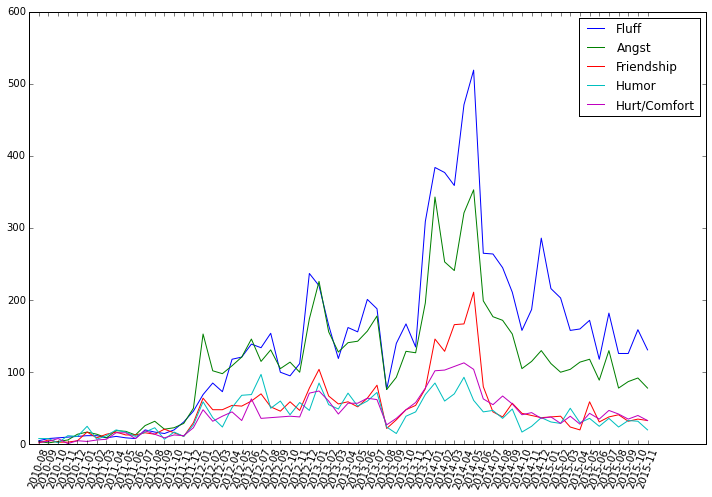

In [58]:
# fig, ax = plt.subplots(figsize = (10,7))
plt.figure(figsize = (10,7))
xlist = range(1,65)
k,v = calculate_tag_time('Fluff')
p1 = plt.plot(xlist,v,label='Fluff')

k,v2 = calculate_tag_time('Angst')
p2 = plt.plot(xlist,v2,label='Angst')

k,v3 = calculate_tag_time('Friendship')
p3 = plt.plot(xlist,v3,label='Friendship')

k,v4 = calculate_tag_time('Humor')
p4 = plt.plot(xlist,v4,label='Humor')

k,v5 = calculate_tag_time('Hurt/Comfort')
p5 = plt.plot(xlist,v5,label='Hurt/Comfort')
plt.xticks(xlist, timelist, rotation=70)

# p6 = plt.plot(xlist, time_works, label='All works')
plt.legend()
plt.tight_layout()

plt.savefig('./top_frequency_tag_time.pdf', format = 'pdf')

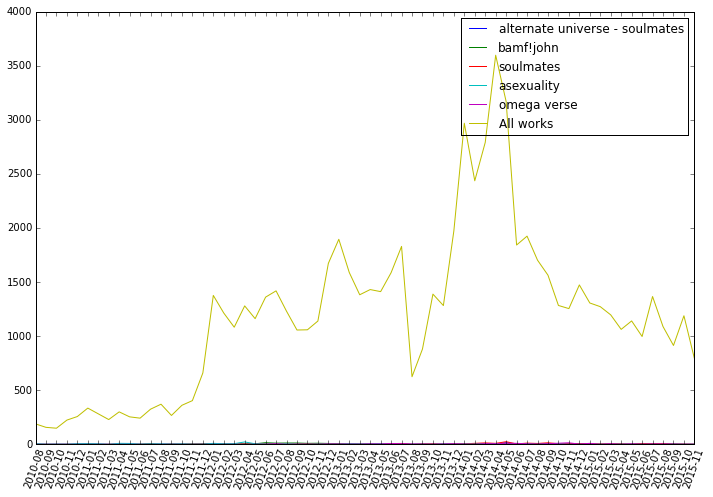

In [60]:
# fig, ax = plt.subplots(figsize = (10,7))
plt.figure(figsize = (10,7))
xlist = range(1,69)
k,v = calculate_tag_time('alternate universe - soulmates')
p1 = plt.plot(xlist,v,label='alternate universe - soulmates')

k,v2 = calculate_tag_time('bamf!john')
p2 = plt.plot(xlist,v2,label='bamf!john')

k,v3 = calculate_tag_time('soulmates')
p3 = plt.plot(xlist,v3,label='soulmates')

k,v4 = calculate_tag_time('asexuality')
p4 = plt.plot(xlist,v4,label='asexuality')

k,v5 = calculate_tag_time('omega verse')
p5 = plt.plot(xlist,v5,label='omega verse')
plt.xticks(xlist, timelist, rotation=70)

plt.legend()
plt.tight_layout()

plt.savefig('./top_popularity_tag_time.pdf', format = 'pdf')

In [ ]:
('graphics', 26.727272727272727),
 ('songfic', 25.755905511811022),
 ('cover art', 25.68106312292359),
 ('poetry', 17.614197530864196),
 ('original character(s)', 16.916666666666668),
 ('audio format: mp3', 14.562043795620438),
 ('2000 au', 7.7046979865771812)]

In [ ]:
community: watsons_woes', 32.307189542483663),
 ('221b', 32.273247496423465),
 ('221b ficlet', 32.145354185832566),
 ('post-the reichenbach fall', 30.830065359477125),
 ('john watson - freeform', 29.157142857142858),
 ('mormor', 28.441064638783271),
 ('photoshop', 27.719745222929937),
 ('graphics', 26.727272727272727),

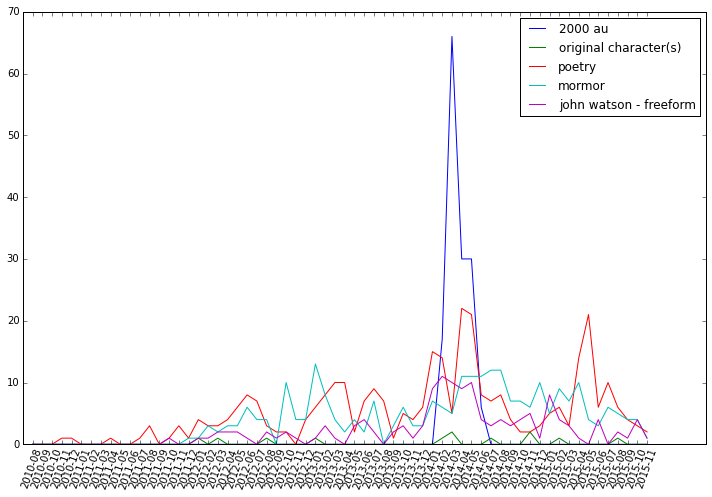

In [68]:
# fig, ax = plt.subplots(figsize = (10,7))
plt.figure(figsize = (10,7))
xlist = range(1,65)
k,v = calculate_tag_time('2000 au')
p1 = plt.plot(xlist,v,label='2000 au')

k,v2 = calculate_tag_time('original character(s)')
p2 = plt.plot(xlist,v2,label='original character(s)')

k,v3 = calculate_tag_time('poetry')
p3 = plt.plot(xlist,v3,label='poetry')

k,v4 = calculate_tag_time('mormor')
p4 = plt.plot(xlist,v4,label='mormor')

k,v5 = calculate_tag_time('john watson - freeform')
p5 = plt.plot(xlist,v5,label='john watson - freeform')
plt.xticks(xlist, timelist, rotation=70)

plt.legend()
plt.tight_layout()

# plt.savefig('./top_popularity_tag_time.pdf', format = 'pdf')

In [53]:
time_works = [ 189,
 157,
 149,
 224,
 257,
 335,
 282,
 229,
 300,
 254,
 242,
 325,
 371,
 267,
 361,
 404,
 660,
 1377,
 1214,
 1083,
 1280,
 1162,
 1361,
 1419,
 1231,
 1057,
 1059,
 1140,
 1673,
 1896,
 1589,
 1383,
 1431,
 1412,
 1587,
 1830,
 625,
 881,
 1389,
 1283,
 1973,
 2969,
 2437,
 2791,
 3598,
 3170,
 1843,
 1925,
 1703,
 1564,
 1284,
 1255,
 1474,
 1307,
 1273,
 1197,
 1063,
 1141,
 997,
 1367,
 1089,
 914,
 1189,
 794]

In [54]:
len(time_works)

64

In [ ]:
#combine 同义词(eg. post rein)
#detect tags that appear early/late (those like post rein can be sanity check  )